In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

# Load datasets
client_df = pd.read_csv(r"C:\Users\nagab\Downloads\historical_customer_data.csv")
price_df = pd.read_csv(r"C:\Users\nagab\Downloads\historical_pricing_data.csv")



In [7]:
# Check columns, data types, missing values
print(client_df.info())
print(price_df.info())

# Preview first few rows
display(client_df.head())
display(price_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [8]:
# Numeric summaries
print(client_df.describe())
print(price_df.describe())

# Unique values for categorical columns
categorical_cols = client_df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}: {client_df[col].nunique()} unique values")


           cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000

In [10]:
# Step 4: Merge Datasets (Corrected)
client_df.columns = client_df.columns.str.strip()
price_df.columns = price_df.columns.str.strip()

# Convert price_date to datetime
price_df['price_date'] = pd.to_datetime(price_df['price_date'])

# Get latest price per customer
latest_price_df = price_df.sort_values('price_date').groupby('id').tail(1)

# Merge client data with latest price
data = client_df.merge(latest_price_df, on='id', how='left')

print("\nMerged Data Preview:")
display(data.head())



Merged Data Preview:


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-12-01,0.146033,0.085483,0.000000,44.266930,0.00000,0.000000
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,2015-12-01,0.147600,0.000000,0.000000,44.444710,0.00000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,2015-12-01,0.167798,0.088409,0.000000,44.444710,0.00000,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,2015-12-01,0.148586,0.000000,0.000000,44.444710,0.00000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,2015-12-01,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555


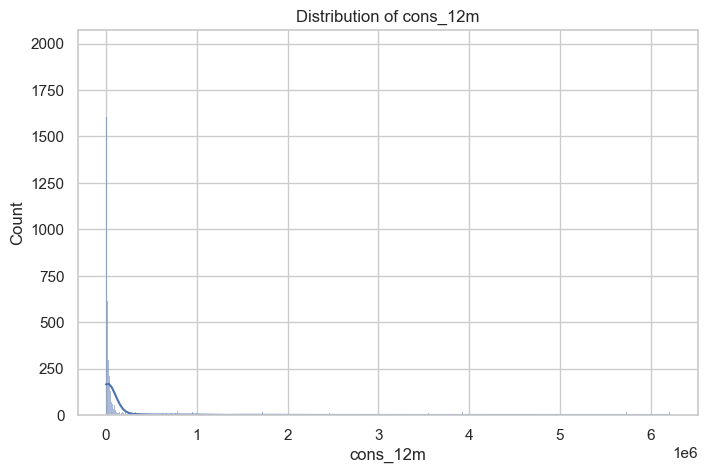

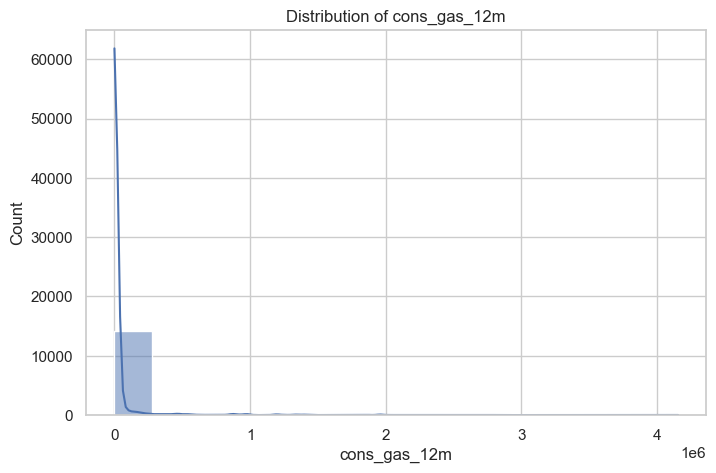

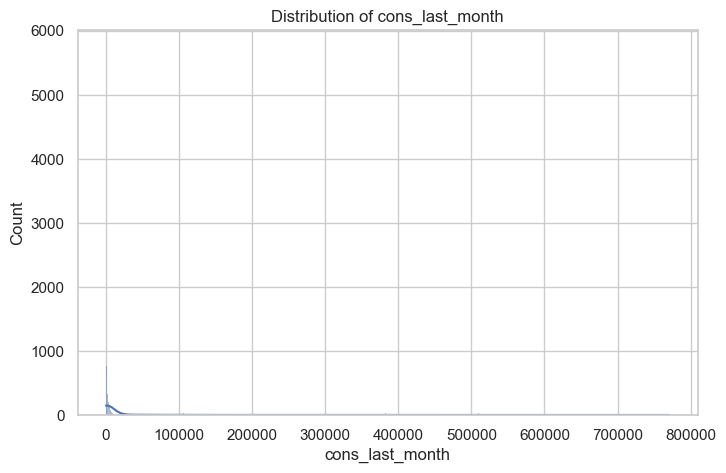

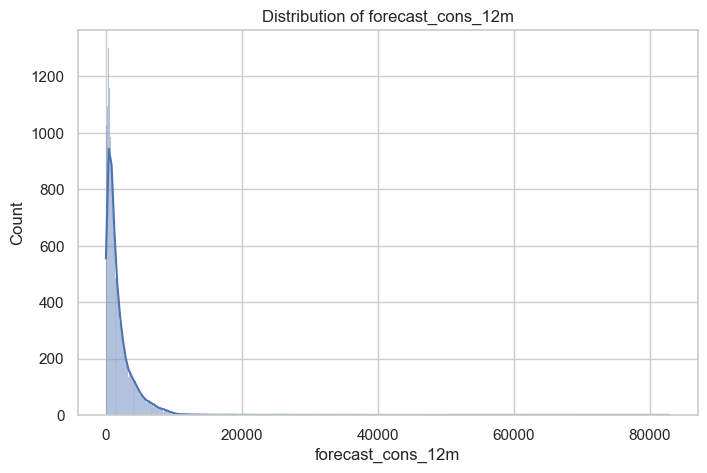

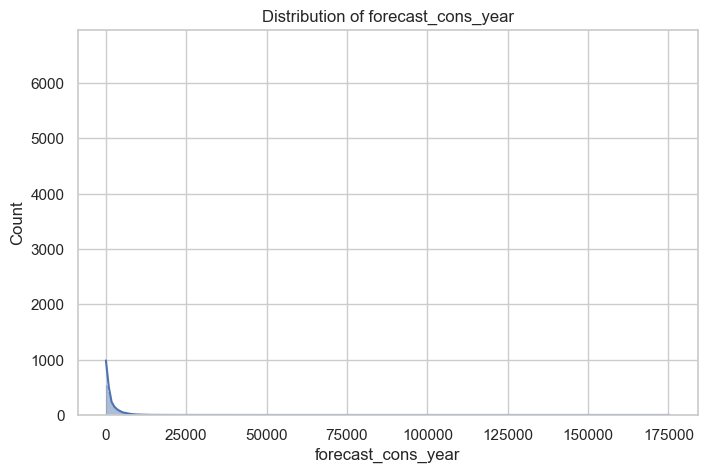

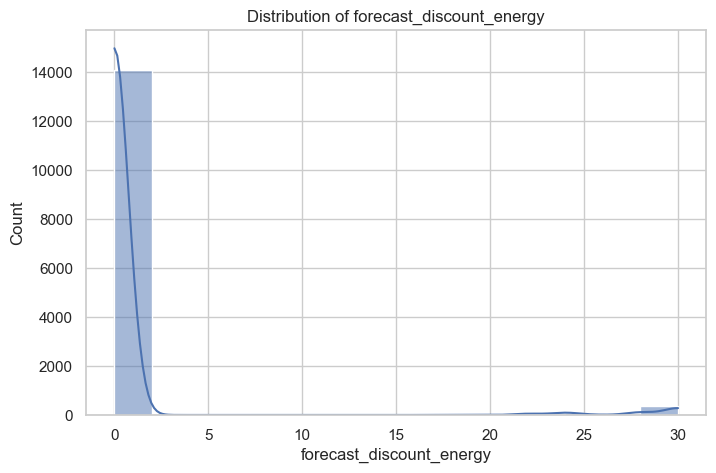

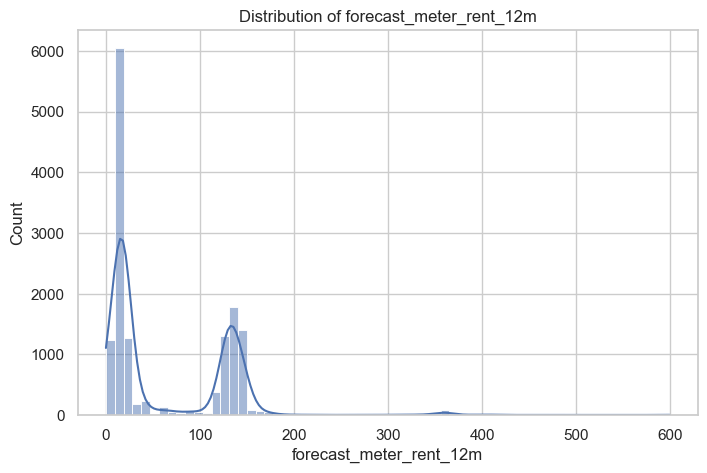

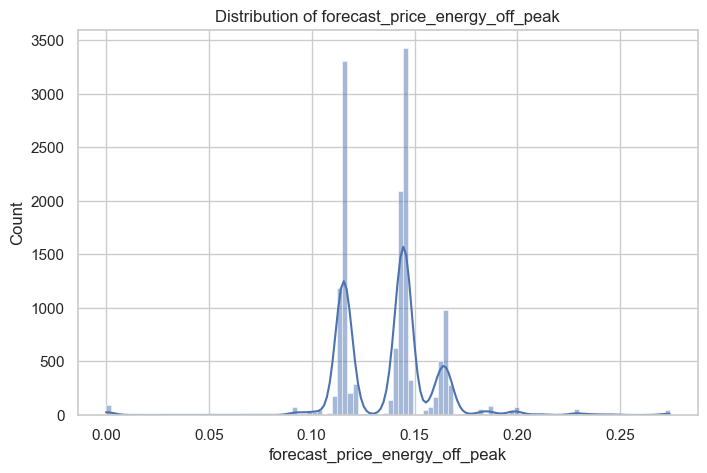

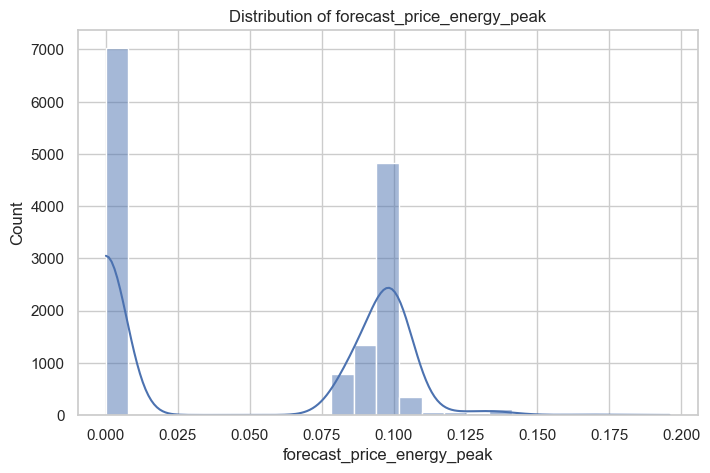

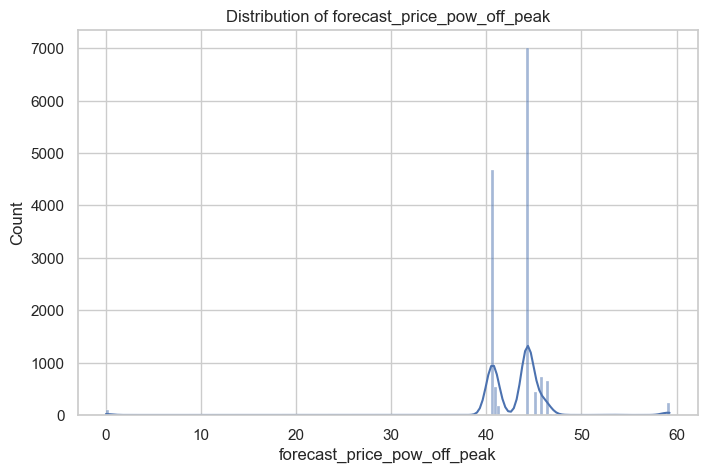

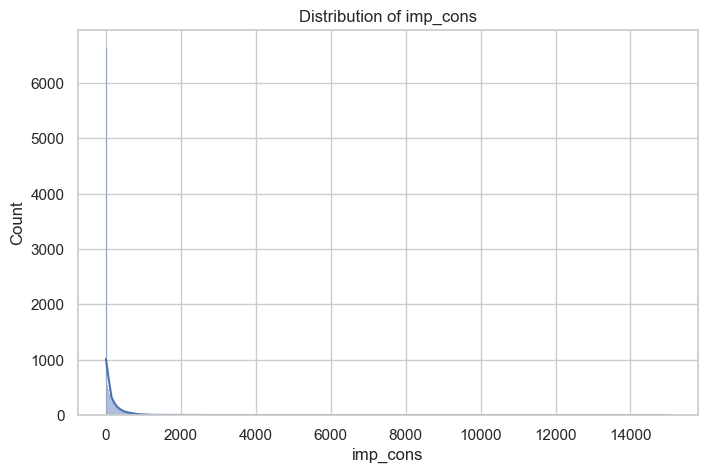

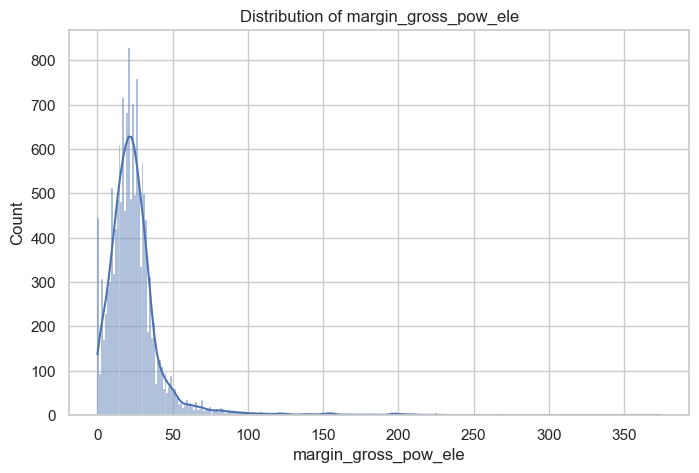

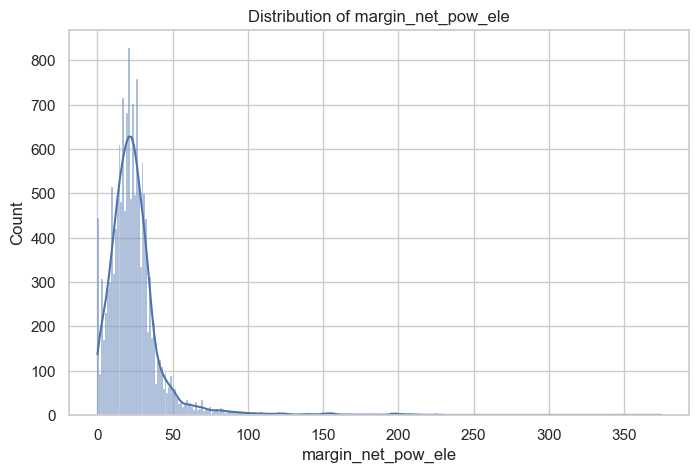

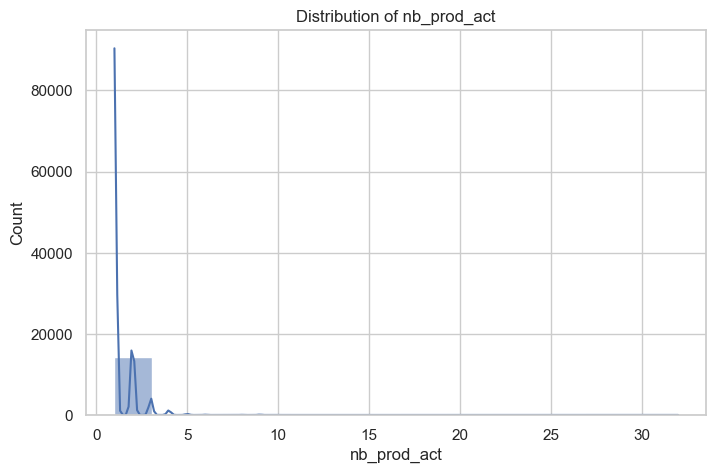

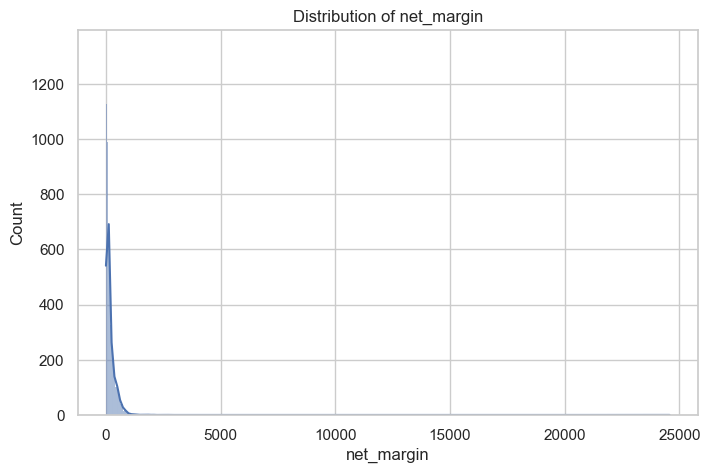

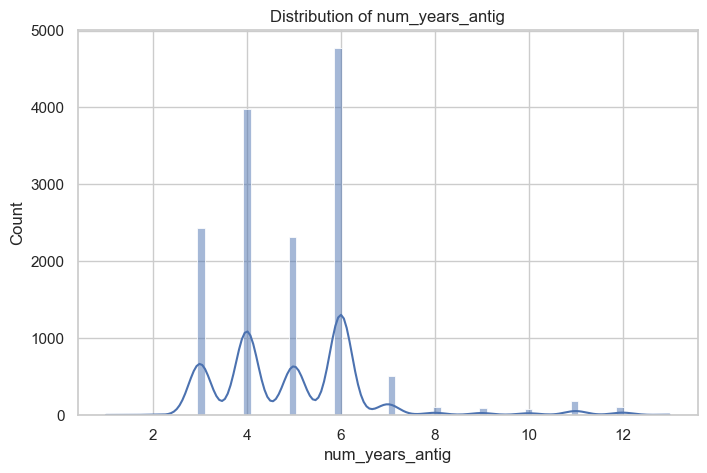

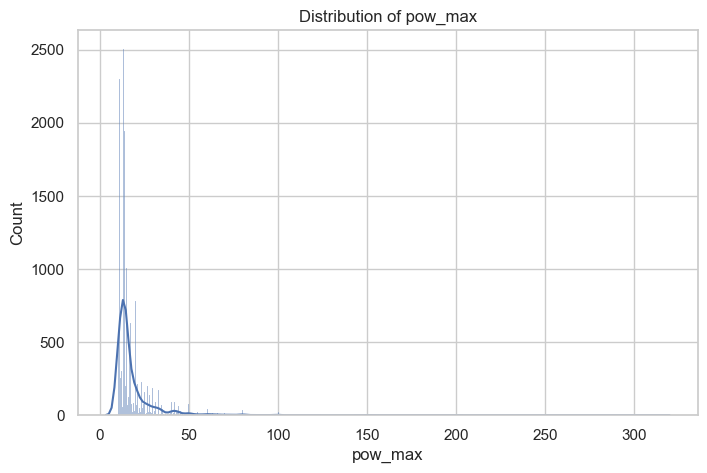

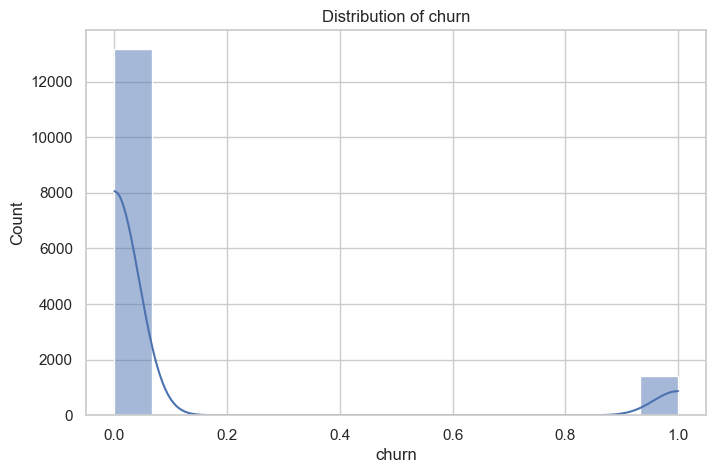

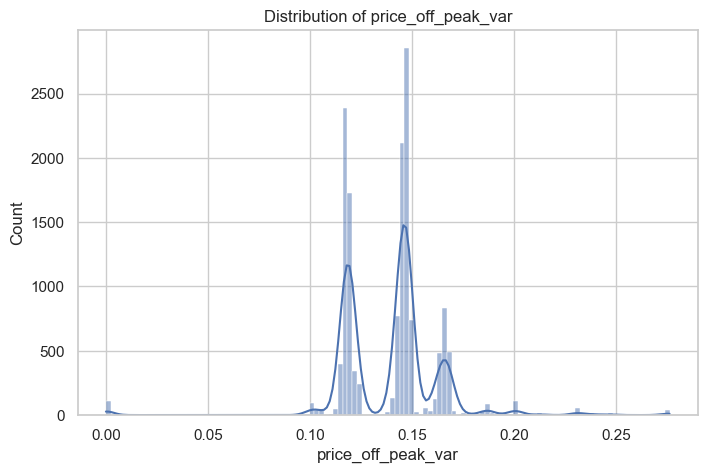

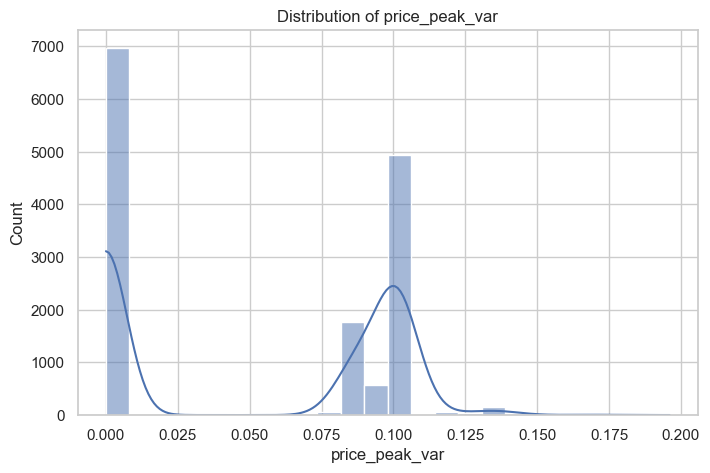

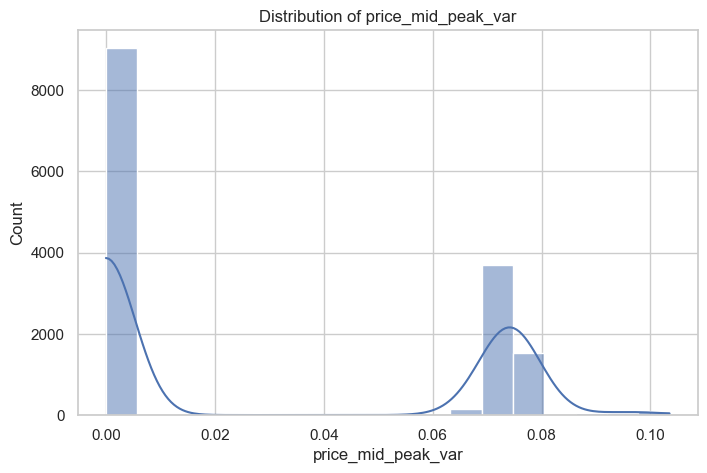

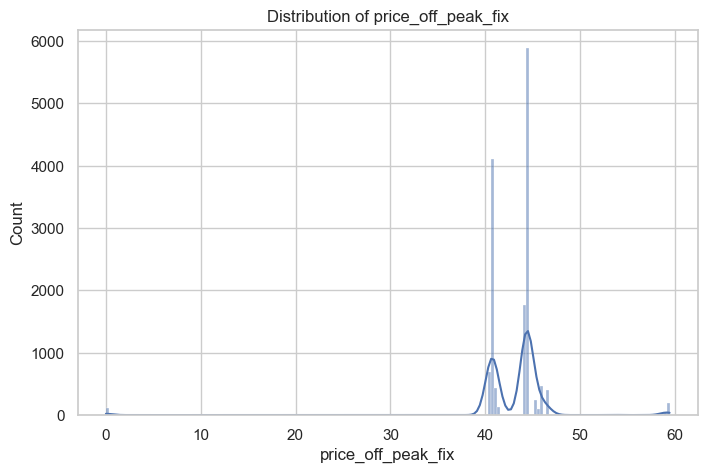

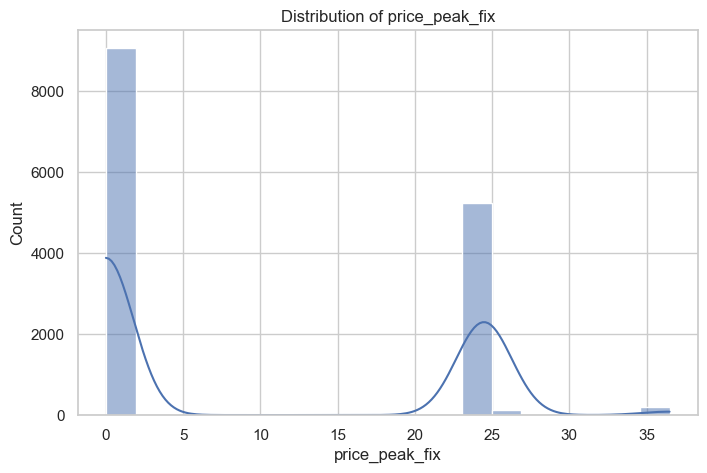

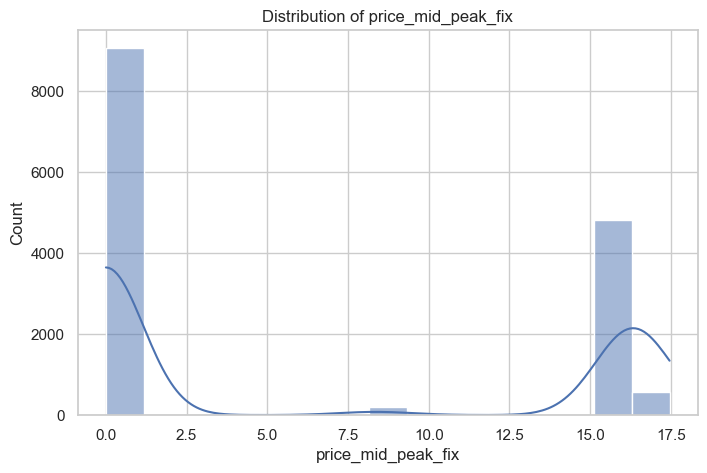

ValueError: could not convert string to float: '24011ae4ebbe3035111d65fa7c15bc57'

<Figure size 800x500 with 0 Axes>

In [11]:
# Histogram of numeric columns
numeric_cols = data.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Countplot for categorical column (if exists)
if 'contract_type' in data.columns:
    plt.figure()
    sns.countplot(x='contract_type', data=data)
    plt.title('Number of Customers by Contract Type')
    plt.show()

# Scatterplot: Usage vs Price (if exists)
if 'usage' in data.columns and 'price' in data.columns:
    plt.figure()
    sns.scatterplot(x='price', y='usage', data=data)
    plt.title('Customer Usage vs Price')
    plt.show()

# Correlation heatmap
plt.figure()
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
